In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

In [2]:
prod_df = pd.read_table('./data/products.tsv')
rev_df = pd.read_table('./data/reviews.tsv')
prod_df.loc[16,'product_model'] = '100% Cotton Reuseable Face Masks'
prod_df.head()

,product_id,product_name,product_model,product_features,prod_features1,prod_features2,prod_features3,product_price,price_currency,product_availability,product_url,source_url
0,103205,Dr. Puri,Disposable KF94 ( N95 / KN95/ FFP2 ) Mask,"20 Masks, ,",20 Masks,NaN,NaN,2.95,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Hwipure-Disposable-KF9...,https://au.iherb.com/c/protective-face-masks
1,101774,HIGUARD,Disposable KF94 ( N95 / KN95/ FFP2 ) Mask,"1 Mask, ,",1 Mask,NaN,NaN,2.95,AUD,http://schema.org/InStock,https://au.iherb.com/pr/HIGUARD-Disposable-KF9...,https://au.iherb.com/c/protective-face-masks
2,102455,Now Foods,Face Mask,"Grey, S-M, 1 Mask",Grey,S-M,1 Mask,2.95,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Now-Foods-Face-Mask-Gr...,https://au.iherb.com/c/protective-face-masks
3,100840,YJ Corporation,Disposable KF94 ( N95 / KN95/ FFP2 ) Mask,"for Kids, 1 Mask,",for Kids,1 Mask,NaN,3.93,AUD,http://schema.org/InStock,https://au.iherb.com/pr/YJ-Corporation-Disposa...,https://au.iherb.com/c/protective-face-masks
4,100839,One Fine Day,Disposable KF94 ( N95 / KN95/ FFP2 ) Mask,"1 Mask, ,",1 Mask,NaN,NaN,4.49,AUD,http://schema.org/InStock,https://au.iherb.com/pr/One-Fine-Day-Disposabl...,https://au.iherb.com/c/protective-face-masks


In [3]:
df = pd.merge(rev_df,prod_df, left_on=['productId'], right_on=['product_id'])
df.drop(columns=df.columns[0], axis=1,  inplace=True)
df.head()

,abuseCount,customerNickname,helpfulNo,helpfulYes,id,imagesCount,languageCode,postedDate,productId,profileInfo.ugcSummary.answerCount,...,product_model,product_features,prod_features1,prod_features2,prod_features3,product_price,price_currency,product_availability,product_url,source_url
0,0,iHerb Customer,0,0,c2d6b926-78b6-4ca3-90d3-23b96c0c9ac7,0,en-US,2021-02-06T12:46:05.712Z,99829,0.0,...,Nano Reusable Face Protection Mask,"Large, 1 Mask,",Large,1 Mask,NaN,22.44,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Kosette-Nano-Reusable-...,https://au.iherb.com/c/protective-face-masks
1,0,iHerb Customer,0,0,6094d104-1216-40aa-903d-74e98f939558,0,ru-RU,2021-02-06T07:01:31.423Z,99829,0.0,...,Nano Reusable Face Protection Mask,"Large, 1 Mask,",Large,1 Mask,NaN,22.44,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Kosette-Nano-Reusable-...,https://au.iherb.com/c/protective-face-masks
2,0,iHerb Customer,0,0,bb102f95-fd45-4534-9f2a-d011fd7cb085,0,en-US,2021-02-05T14:18:31.551Z,99829,0.0,...,Nano Reusable Face Protection Mask,"Large, 1 Mask,",Large,1 Mask,NaN,22.44,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Kosette-Nano-Reusable-...,https://au.iherb.com/c/protective-face-masks
3,0,iHerb Customer,0,0,fc38ffce-201a-45bd-9698-1bce39a673af,0,ar-SA,2021-02-05T12:03:11.928Z,99829,1.0,...,Nano Reusable Face Protection Mask,"Large, 1 Mask,",Large,1 Mask,NaN,22.44,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Kosette-Nano-Reusable-...,https://au.iherb.com/c/protective-face-masks
4,0,iHerb Customer,0,0,c1e2708f-c584-49aa-b19f-7fef1672c796,0,en-US,2021-02-04T17:21:53.418Z,99829,0.0,...,Nano Reusable Face Protection Mask,"Large, 1 Mask,",Large,1 Mask,NaN,22.44,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Kosette-Nano-Reusable-...,https://au.iherb.com/c/protective-face-masks


<BarContainer object of 16 artists>

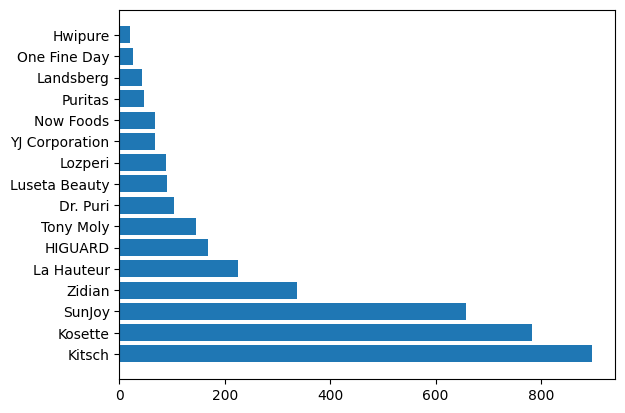

In [4]:
plt.barh(df.product_name.value_counts().index,df.product_name.value_counts())

<BarContainer object of 13 artists>

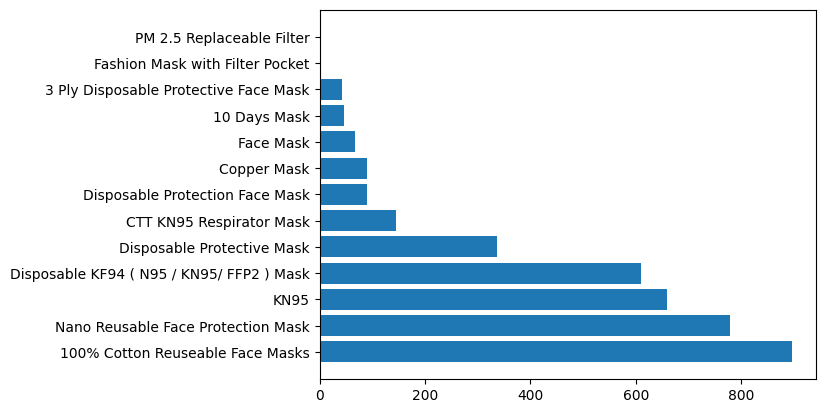

In [5]:
plt.barh(df.product_model.value_counts().index,df.product_model.value_counts())

In [6]:
count_df = pd.DataFrame(df.product_id.value_counts())
add_brand = list()
add_model = list()
add_features = list()
for i in count_df.index:
    add_brand.append(prod_df[prod_df['product_id'] == i].product_name.iloc[0])
    add_model.append(prod_df[prod_df['product_id'] == i].product_model.iloc[0])
    add_features.append(prod_df[prod_df['product_id'] == i].product_features.iloc[0].rstrip(', ,'))
count_df['brand'] = pd.Series(add_brand).values
count_df['model'] = pd.Series(add_model).values
count_df['features'] = pd.Series(add_features).values
count_df = count_df.rename(columns={'product_id':'count'})
count_df.head()

,count,brand,model,features
101955,658,SunJoy,KN95,"Professional Protective Disposable Face Mask, ..."
100237,530,Kitsch,100% Cotton Reuseable Face Masks,"Leopard, 3 Pack"
99830,475,Kosette,Nano Reusable Face Protection Mask,"Medium, 1 Mask"
102734,337,Zidian,Disposable Protective Mask,50 Pack
99829,304,Kosette,Nano Reusable Face Protection Mask,"Large, 1 Mask"


In [7]:
fig = px.bar(
    count_df.sort_values(by='count',ascending=False),x='brand',y='count',
    color='model', hover_name="model", hover_data=["features"],text_auto=True)
fig.write_html('top5products.html')
fig.show()

In [8]:
df.columns

Index(['abuseCount', 'customerNickname', 'helpfulNo', 'helpfulYes', 'id',
       'imagesCount', 'languageCode', 'postedDate', 'productId',
       'profileInfo.ugcSummary.answerCount',
       'profileInfo.ugcSummary.reviewCount', 'ratingValue', 'reviewText',
       'reviewTitle', 'reviewed', 'score', 'languageCode.1', 'country',
       'translation.reviewText', 'translation.reviewTitle', 'newReviewText',
       'polarity', 'Sentiment', 'product_id', 'product_name', 'product_model',
       'product_features', 'prod_features1', 'prod_features2',
       'prod_features3', 'product_price', 'price_currency',
       'product_availability', 'product_url', 'source_url'],
      dtype='object')

In [7]:
sentiment_df = pd.DataFrame(df[df['product_name'].isin(['SunJoy','Kitsch','Kosette','Zidian','La Hauteur'])][['product_name','Sentiment']].value_counts()).reset_index().sort_values(by='product_name').rename(columns={0:'count'})
sentiment_df.head()

,product_name,Sentiment,count
0,Kitsch,positive,798
5,Kitsch,negative,98
1,Kosette,positive,725
6,Kosette,negative,58
4,La Hauteur,positive,206


In [22]:
fig = px.histogram(sentiment_df, x="product_name", y="count",
             color='Sentiment', barmode='group')
fig.write_html('sentiment_analysis.html')
fig.show()

In [9]:
word_count_df = pd.DataFrame(df[df['product_name'].isin(['SunJoy','Kitsch','Kosette','Zidian','La Hauteur'])][['product_name','newReviewText','Sentiment']])

In [20]:
word_count_df.to_csv('./data/review_sentiment.tsv',sep='\t')